# Vizualization of RMS 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u

# Define the filenames of the two data cubes
hdu1 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/RMS/CF+_N159_sci_VELAXIS_inK_SPECT_SPAT_RES_RMS.fits'
hdu2 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/RMS/CF+_N159_sci_VELAXIS_inK_SPECT_SPAT_RES_RMS_NOPBCOR.fits'

# Read the FITS files
file1 = fits.open(hdu1)[0]
file2 = fits.open(hdu2)[0]

# Extract the data
data1 = file1.data
data2 = file2.data

print("Data shape for file 1:", data1.shape)
print("Data shape for file 2:", data2.shape)

Data shape for file 1: (60, 70)
Data shape for file 2: (60, 70)


In [2]:
# Flatten the 2D arrays for histogram
data1_flat = data1.flatten()
data2_flat = data2.flatten()

# Remove any NaN or infinite values
data1_flat = data1_flat[np.isfinite(data1_flat)]
data2_flat = data2_flat[np.isfinite(data2_flat)]


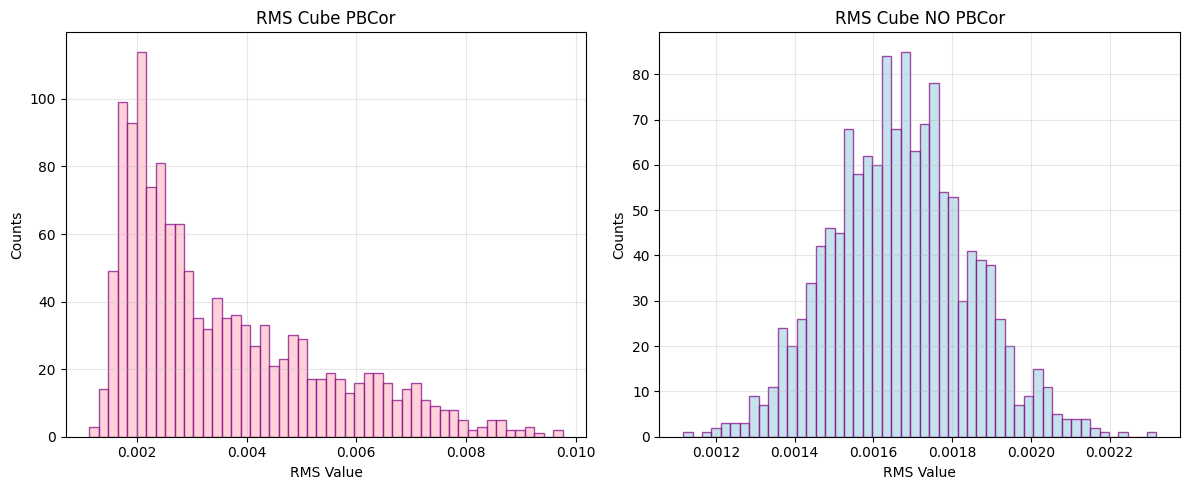

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for the first cube
ax1.hist(data1_flat, bins=50, color='pink', alpha=0.7, edgecolor='purple')
ax1.set_title('RMS Cube PBCor')
ax1.set_xlabel('RMS Value', s)
ax1.set_ylabel('Accounts')
ax1.grid(True, alpha=0.3)

# Histogram for the second cube
ax2.hist(data2_flat, bins=50, color='lightblue', alpha=0.7, edgecolor='purple')
ax2.set_title('RMS Cube NO PBCor')
ax2.set_xlabel('RMS Value')
ax2.set_ylabel('Accounts')
ax2.grid(True, alpha=0.3)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

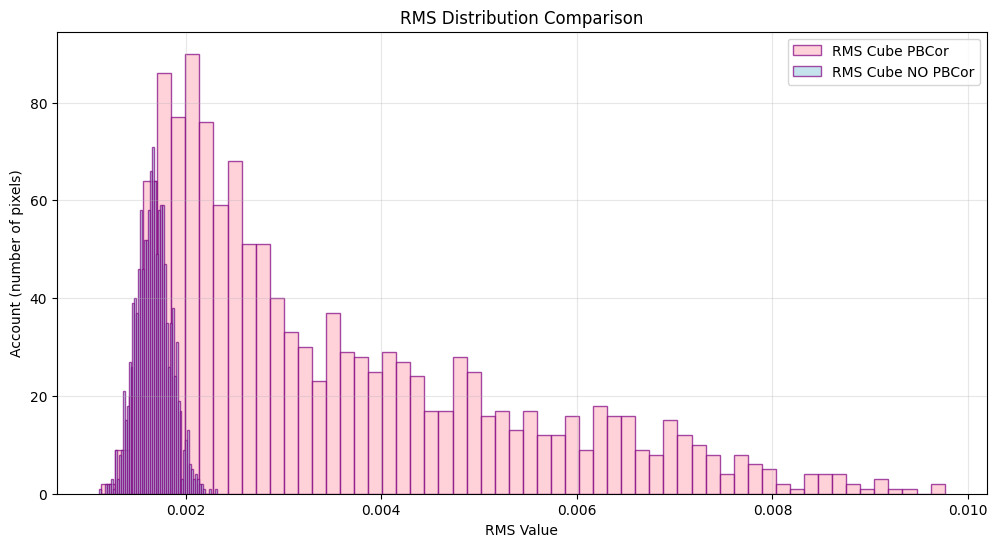

In [15]:
# Create a single figure
plt.figure(figsize=(12, 6))

# Plot overlaid histograms
plt.hist(data1_flat, bins=60, color='pink', alpha=0.7, edgecolor='purple', label='RMS Cube PBCor')
plt.hist(data2_flat, bins=60, color='lightblue', alpha=0.7, edgecolor='purple', label='RMS Cube NO PBCor')

# Customize the plot
plt.title('RMS Distribution Comparison')
plt.xlabel('RMS Value')
plt.ylabel('Account (number of pixels)')
plt.grid(True, alpha=0.3)
plt.legend()

# Show the plot
plt.show()

### Applied the adjust

In [7]:
from scipy import stats

# Fit Gaussian to the data
def fit_gaussian(data, label):
    mu, sigma = stats.norm.fit(data)
    return mu, sigma

# Compute statistics and Gaussian fit
def compute_stats(data, label):
    mu, sigma = fit_gaussian(data, label)
    mean = np.mean(data)
    median = np.median(data)
    std = np.std(data)
    skew = stats.skew(data)
    kurt = stats.kurtosis(data)
    percentiles = np.percentile(data, [1, 25, 75, 99])
    
    print(f"\nStatistics for {label}:")
    print(f"Gaussian Fit - Mean: {mu:.6e}, Std Dev: {sigma:.6e}")
    print(f"Data - Mean: {mean:.6e}")
    print(f"Data - Median: {median:.6e}")
    print(f"Data - Std Dev: {std:.6e}")
    print(f"Data - Skewness: {skew:.3f}")
    print(f"Data - Kurtosis: {kurt:.3f}")
    print(f"Data - Percentiles (1st, 25th, 75th, 99th): {percentiles}")
    
    return mu, sigma


In [8]:

# Compute statistics and Gaussian fit for both datasets
mu1, sigma1 = compute_stats(data1_flat, "SPEC_SPAT_Res")
mu2, sigma2 = compute_stats(data2_flat, "noespecRes")

# KS test to compare distributions
ks_stat, p_value = stats.ks_2samp(data1_flat, data2_flat)
print(f"\nKS Test: statistic={ks_stat:.3f}, p-value={p_value:.3e}")
print("Small p-value (<0.05) suggests different distributions.")



Statistics for SPEC_SPAT_Res:
Gaussian Fit - Mean: 9.331384e-03, Std Dev: 4.813193e-03
Data - Mean: 9.331384e-03
Data - Median: 7.675830e-03
Data - Std Dev: 4.813193e-03
Data - Skewness: 0.990
Data - Kurtosis: 0.005
Data - Percentiles (1st, 25th, 75th, 99th): [0.00392673 0.00541565 0.01211833 0.02192498]

Statistics for noespecRes:
Gaussian Fit - Mean: 2.595159e-03, Std Dev: 1.315793e-03
Data - Mean: 2.595159e-03
Data - Median: 2.140583e-03
Data - Std Dev: 1.315793e-03
Data - Skewness: 0.999
Data - Kurtosis: 0.081
Data - Percentiles (1st, 25th, 75th, 99th): [0.00110437 0.00151781 0.00340226 0.00618885]

KS Test: statistic=0.821, p-value=8.350e-322
Small p-value (<0.05) suggests different distributions.


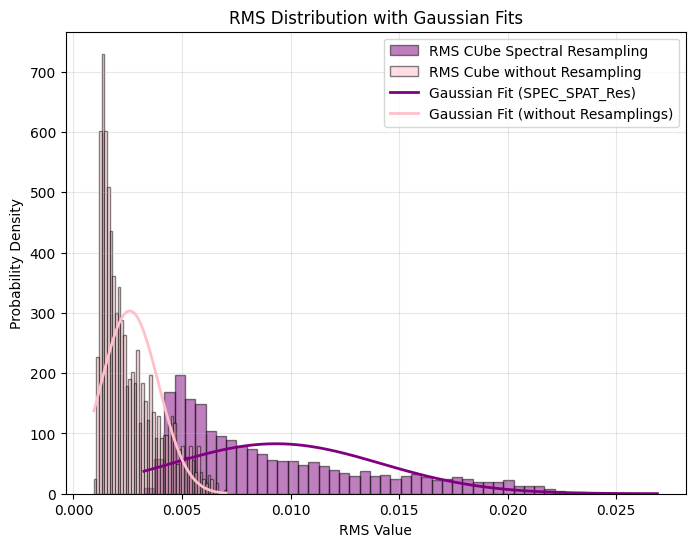

In [9]:

# Create a single figure for histograms
plt.figure(figsize=(8, 6))

# Plot normalized histograms
hist1, bins1, _ = plt.hist(data1_flat, bins=50, color='purple', alpha=0.5, density=True, edgecolor='black', label='RMS CUbe Spectral Resampling')
hist2, bins2, _ = plt.hist(data2_flat, bins=50, color='pink', alpha=0.5, density=True, edgecolor='black', label='RMS Cube without Resampling')

# Plot Gaussian fits
x1 = np.linspace(min(bins1), max(bins1), 100)
x2 = np.linspace(min(bins2), max(bins2), 100)
plt.plot(x1, stats.norm.pdf(x1, mu1, sigma1), 'purple', lw=2, label='Gaussian Fit (SPEC_SPAT_Res)')
plt.plot(x2, stats.norm.pdf(x2, mu2, sigma2), 'pink', lw=2, label='Gaussian Fit (without Resamplings)')

# Customize the plot
plt.title('RMS Distribution with Gaussian Fits')
plt.xlabel('RMS Value')
plt.ylabel('Probability Density')
plt.grid(True, alpha=0.3)
plt.legend()

# Show the plot
plt.show()